[0.05       0.05072996 0.05262168 ... 0.05693346 0.05693346 0.05693346]
[0.00000000e+00 1.91938516e-02 8.18371302e-02 ... 7.99310188e+02
 7.99810188e+02 8.00000000e+02]
[0.05693346 0.0569927  0.05711696 ... 0.05724473 0.05724473 0.05724473]
[0.00000000e+00 3.64052014e-02 1.53557355e-01 ... 7.99449825e+02
 7.99949825e+02 8.00000000e+02]
[0.05724473 0.057309   0.05744552 ... 0.05758965 0.05758965 0.05758965]
[0.00000000e+00 3.57899844e-02 1.51451451e-01 ... 7.99394804e+02
 7.99894804e+02 8.00000000e+02]
[0.05758965 0.05765874 0.05780725 ... 0.05796772 0.05796772 0.05796772]
[0.00000000e+00 3.52740369e-02 1.49790247e-01 ... 7.99350624e+02
 7.99850624e+02 8.00000000e+02]
[0.05796772 0.05804143 0.05820169 ... 0.05837844 0.05837844 0.05837844]
[0.00000000e+00 3.48392450e-02 1.48499357e-01 ... 7.99315053e+02
 7.99815053e+02 8.00000000e+02]
[0.05837844 0.0584566  0.05862838 ... 0.05882137 0.05882137 0.05882137]
[0.00000000e+00 3.44717848e-02 1.47521925e-01 ... 7.99273670e+02
 7.99773670e+02 8.

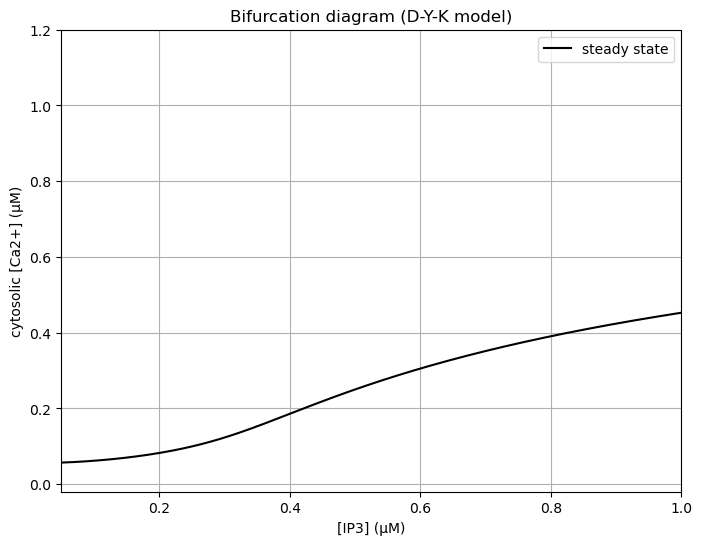

In [8]:

import numpy as np
from scipy.integrate import solve_ivp
from numpy.linalg import eigvals
import matplotlib.pyplot as plt


CO = 2.0       
c1 = 0.185     
v1 = 6.0       
v2 = 0.11      
v3 = 0.9        
k3 = 0.1       

# receptor binding constants
a1 = 400.0
a2 = 0.2
a3 = 400.0
a4 = 0.2
a5 = 20.0

d1 = 0.13      
d2 = 1.049     
d3 = 0.9434    
d4 = 0.1445   
d5 = 0.08234   


# -------------------------------------------------------------------------

def P_open(C, IP3):
    """

    """
    numerator = C * IP3 * d2
    denominator = (C * IP3 + IP3 * d2 + d1*d2 + C*d3)*(C + d5)
   
    return (numerator/denominator)**3

def J1(C, CaER, IP3):
    return c1 * (v1 * P_open(C, IP3) + v2) * (CaER - C)

def J2(C):
    return v3 * (C**2) / (C**2 + k3**2)

def rhs(t, y, IP3):
    C = y[0]
    CaER = (CO - C) / c1
    dCdt = J1(C, CaER, IP3) - J2(C)
    return [dCdt]



IP3_vals = np.linspace(0.05, 1.0, 200)   # µM, dense enough to capture the Hopf region (~0.37-0.62)
steady_C = np.zeros_like(IP3_vals)
stability = np.zeros_like(IP3_vals, dtype=int)  # 1 stable, -1 unstable
osc_min = np.full_like(IP3_vals, np.nan)
osc_max = np.full_like(IP3_vals, np.nan)

relax_t = (0, 800.0)   
rtol = 1e-6
atol = 1e-8

for i, ip3 in enumerate(IP3_vals):
    if i == 0:
        y0 = [0.05]   
    else:
        y0 = [steady_C[i-1] if steady_C[i-1] > 0 else 0.05]

    sol = solve_ivp(rhs, relax_t, y0, args=(ip3,), dense_output=True,
                    rtol=rtol, atol=atol, method='RK45', max_step=0.5)

    C_t = sol.y[0]
    t = sol.t
    C_final = C_t[-1]
    steady_C[i] = C_final

   
plt.figure(figsize=(8,6))






plt.plot(IP3_vals, steady_C, 'k-', label='steady state')

plt.xlabel('[IP3] (µM)')
plt.ylabel('cytosolic [Ca2+] (µM)')
plt.title('Bifurcation diagram (D-Y-K model)')
plt.ylim(-0.02, 1.2)
plt.xlim(IP3_vals[0], IP3_vals[-1])
plt.legend(loc='best')
plt.grid(True)
plt.show()
